In [25]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy
import matplotlib.patches as mpatches
from venn import venn
import statistics as stat
from qiime2 import Artifact
import matplotlib.patches as mpl_patches
%matplotlib inline

In [26]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['svg.fonttype'] = 'none'
sns.set(style='whitegrid')

In [27]:
#1. Diurnal no bloom
#2. Diurnal bloom
#3 Seasonal no bloom
#4 Seasonal bloom
#5 Seasonal nh no bloom
#6 Seasonal nh bloom

## Diurnal No bloom

In [28]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/phylum.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/class.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/order.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/family.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/genus.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/asv.csv', index_col = 'test')

In [29]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [30]:
len(phyr)

14

In [31]:
len(phyrr)

5

In [32]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/'+str(len(phyr))], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'+str(len(phyr))], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [33]:
len(classr)

23

In [34]:
len(classrr)

7

In [35]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/'+str(len(classr))], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/'+str(len(classr))], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [36]:
len(orderr)

59

In [37]:
len(orderrr)

25

In [38]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/'+str(len(orderr))], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/'+str(len(orderr))], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [39]:
len(familyr)

113

In [40]:
len(familyrr)

36

In [51]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/'+str(len(familyr))], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/'+str(len(familyr))], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [52]:
len(genusr)

314

In [53]:
len(genusrr)

97

In [54]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/'+str(len(genusr))], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/'+str(len(genusr))], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [55]:
len(asvrr)

224

In [56]:
len(asvr)

1658

In [57]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [58]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [59]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

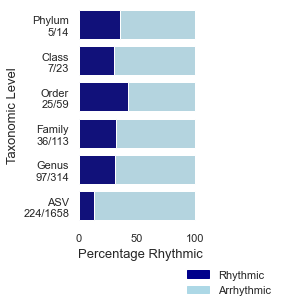

In [60]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure1/tax_barplot.svg', format = 'svg')

## Diurnal With bloom

In [27]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/phylum.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/class.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/order.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/family.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/genus.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/diurnal/bloom/asv.csv', index_col = 'test')

In [28]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [29]:
len(phyr)

14

In [30]:
len(phyrr)

12

In [31]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [32]:
len(classr)

23

In [33]:
len(classrr)

17

In [34]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [35]:
len(orderr)

59

In [36]:
len(orderrr)

29

In [37]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [38]:
len(familyr)

114

In [39]:
len(familyrr)

61

In [40]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [41]:
len(genusr)

315

In [42]:
len(genusrr)

142

In [43]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [44]:
len(asvrr)

313

In [45]:
len(asvr)

1653

In [46]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [47]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [48]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

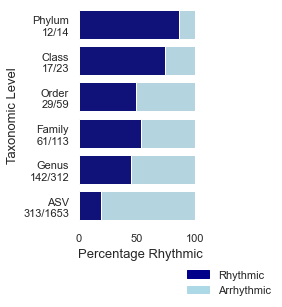

In [49]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure1/tax_barplot_bloom_diurnal.svg', format = 'svg')

## Seasonal All Data No bloom

In [50]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/phylum_results.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/class_results.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/order_results.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/family_results.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/genus_results.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/CLR/asv_seasonal.csv', index_col = 'test')

In [51]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [52]:
len(phyr)

14

In [53]:
len(phyrr)

12

In [54]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [55]:
len(classr)

23

In [56]:
len(classrr)

18

In [57]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [58]:
len(orderr)

59

In [59]:
len(orderrr)

46

In [60]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [61]:
len(familyr)

113

In [62]:
len(familyrr)

76

In [63]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [64]:
len(genusr)

312

In [65]:
len(genusrr)

152

In [66]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [67]:
len(asvrr)

632

In [68]:
len(asvr)

1638

In [69]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/1638'], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/1638'], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [70]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [71]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

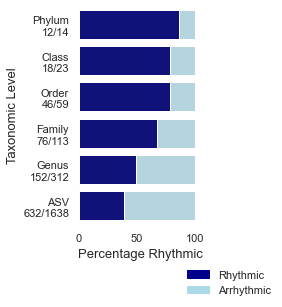

In [72]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure3/nobloom_seasonal_tax_barplot.svg', format = 'svg')

## Seasonal All data bloom

In [73]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/phy.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/class.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/order.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/family.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/genus.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/asv.csv', index_col = 'test')

In [74]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [75]:
len(phyr)

14

In [76]:
len(phyrr)

14

In [77]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [78]:
len(classr)

23

In [79]:
len(classrr)

22

In [80]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [81]:
len(orderr)

59

In [82]:
len(orderrr)

48

In [83]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [84]:
len(familyr)

114

In [85]:
len(familyrr)

90

In [86]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [87]:
len(genusr)

315

In [88]:
len(genusrr)

226

In [89]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [90]:
len(asvrr)

639

In [91]:
len(asvr)

1653

In [92]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [93]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [94]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

[None, None, None, None]

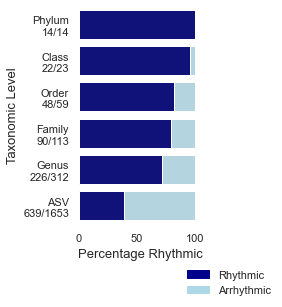

In [95]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
#plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure1/tax_barplot.svg', format = 'svg')

## Seasonal Northern Hemisphere No bloom

In [96]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_phylum_results.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_class_results.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_order_results.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_family_results.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_genus_results.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/nh_asv_results.csv', index_col = 'test')

In [97]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [98]:
len(phyr)

14

In [99]:
len(phyrr)

12

In [100]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [101]:
len(classr)

23

In [102]:
len(classrr)

17

In [103]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [104]:
len(orderr)

59

In [105]:
len(orderrr)

46

In [106]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [107]:
len(familyr)

113

In [108]:
len(familyrr)

69

In [109]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [110]:
len(genusr)

312

In [111]:
len(genusrr)

156

In [112]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [113]:
len(asvrr)

645

In [114]:
len(asvr)

1638

In [115]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/1638'], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/1638'], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [116]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [117]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

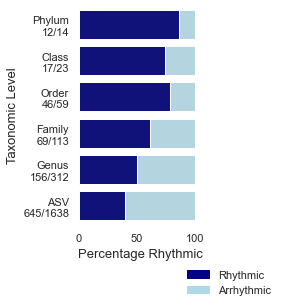

In [118]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure3/no_bloom_nh_seasonal.svg', format = 'svg')

## Seasonal Northern Hemisphere bloom

In [268]:
phyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_phylum.csv', index_col = 'test')
classr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_class.csv', index_col = 'test')
orderr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_order.csv', index_col = 'test')
familyr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_family.csv', index_col = 'test')
genusr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_genus.csv', index_col = 'test')
asvr = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Cosinor_results/Whole Data/2023/seasonal/bloom/nh_asv.csv', index_col = 'test')

In [269]:
phyrr = phyr[phyr.q<0.05]
classrr = classr[classr.q<0.05]
orderrr = orderr[orderr.q<0.05]
familyrr = familyr[familyr.q<0.05]
genusrr = genusr[genusr.q<0.05]
asvrr = asvr[asvr.q<0.05]

In [270]:
len(phyr)

14

In [271]:
len(phyrr)

14

In [272]:
phy = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([len(phyrr)/len(phyr)*100])}
phybar = pd.DataFrame(data=phy)
phy2 = {'Taxa': ['Phylum\n'+str(len(phyrr))+'/14'], 'Count': pd.Series([100])}
phybar2 = pd.DataFrame(data=phy2)

In [273]:
len(classr)

23

In [274]:
len(classrr)

22

In [275]:
clas = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([len(classrr)/len(classr)*100])}
clasbar = pd.DataFrame(data=clas)
clas2 = {'Taxa': ['Class\n'+str(len(classrr))+'/23'], 'Count': pd.Series([100])}
clasbar2 = pd.DataFrame(data=clas2)

In [276]:
len(orderr)

59

In [277]:
len(orderrr)

48

In [278]:
order = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([len(orderrr)/len(orderr)*100])}
orderbar = pd.DataFrame(data=order)
order2 = {'Taxa': ['Order\n'+str(len(orderrr))+'/59'], 'Count': pd.Series([100])}
orderbar2 = pd.DataFrame(data=order2)

In [279]:
len(familyr)

114

In [280]:
len(familyrr)

90

In [281]:
fam = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([len(familyrr)/len(familyr)*100])}
fambar = pd.DataFrame(data=fam)
fam2 = {'Taxa': ['Family\n'+str(len(familyrr))+'/113'], 'Count': pd.Series([100])}
fambar2 = pd.DataFrame(data=fam2)

In [282]:
len(genusr)

315

In [283]:
len(genusrr)

225

In [284]:
gen = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([len(genusrr)/len(genusr)*100])}
genbar = pd.DataFrame(data=gen)
gen2 = {'Taxa': ['Genus\n'+str(len(genusrr))+'/312'], 'Count': pd.Series([100])}
genbar2 = pd.DataFrame(data=gen2)

In [285]:
len(asvrr)

663

In [286]:
len(asvr)

1653

In [287]:
asv = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([len(asvrr)/len(asvr)*100])}
asvbar = pd.DataFrame(data=asv)
asv2 = {'Taxa': ['ASV\n'+str(len(asvrr))+'/'+str(len(asvr))], 'Count': pd.Series([100])}
asvbar2 = pd.DataFrame(data=asv2)

In [288]:
ghost = pd.concat([phybar,clasbar,orderbar,fambar,genbar,asvbar])
ghost1 = pd.concat([phybar2,clasbar2,orderbar2,fambar2,genbar2,asvbar2])

In [289]:
ghost1 = ghost1.rename(columns = {'Count':"Percentage Rhythmic", "Taxa":'Taxonomic Level'})
ghost = ghost.rename(columns = {'Count':"Percentage Rhythmic",'Taxa': 'Taxonomic Level'})

[None, None, None, None]

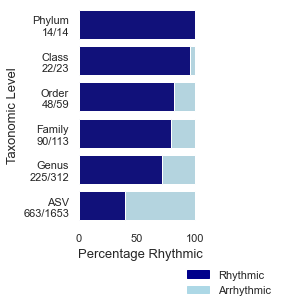

In [290]:
fig, ax = plt.subplots(figsize = (2.2, 4))
sns.set(style="white")
sns.despine(bottom = True, left = True)
jk = sns.barplot(y = ghost1['Taxonomic Level'],x = ghost1['Percentage Rhythmic'], color = 'lightblue')
j = sns.barplot(y = ghost['Taxonomic Level'],x = ghost['Percentage Rhythmic'], color = 'darkblue')
#asvplot111 = sns.barplot(x = asvbar['ASV'],y = asvbar[''], color = 'darkblue')
#asvplot111.set(xlabel = None)
#asvplot211.set(xlabel = None)
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
ax.set_ylabel('Taxonomic Level', fontsize = 13)
ax.set_xlabel('Percentage Rhythmic', fontsize = 13)
#plt.text(color = 'white', x = 0, y = 2.5,s = '8/15',fontsize = 'medium')
plt.legend(handles=[top_bar, bottom_bar], facecolor = 'white', loc = (0.85,-0.35), edgecolor = 'white')
plt.setp(j.get_legend().get_texts(), fontsize='11')
#plt.legend(facecolor='white', framealpha=1)
#plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure1/tax_barplot.svg', format = 'svg')

In [291]:
## Diurnal With blooms